In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K


In [40]:
user_plot_saving_filename = 'mainstreaminess_division_user_distribution.png'
item_plot_saving_filename = 'mainstreaminess_division_item_distribution.png'

### Load  preprocess data

In [41]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [42]:
def plot_distribution(df_orig, df_syn, class_type, plot_saving_filename):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original', color='blue')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN', color='green')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')
    
    plt.title(f'Distribution of ratings among {class_type}', size= 20, fontweight='bold')
    plt.xlabel(f'{class_type}', size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.grid('on')
    #plt.legend(["Beyond-mainstream", "Mainstream"], prop={'size': 18})
    plt.legend(loc='upper right')
    plt.savefig (f"{plot_saving_filename}")
    plt.show()


In [43]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_tau_0.165_750eps_300bs_str3.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


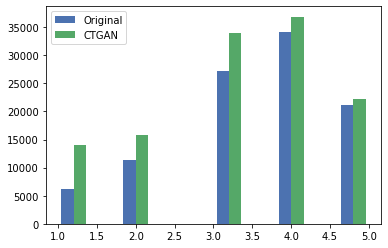

In [44]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

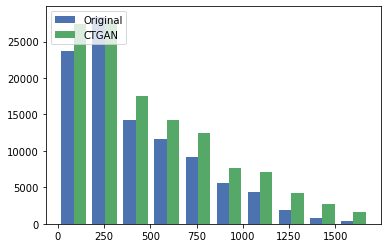

In [45]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [46]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [47]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

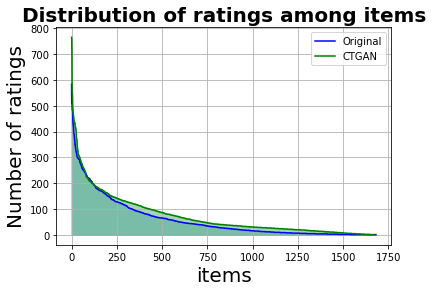

In [48]:
plot_distribution(df_items_orig, df_items_syn, 'items', item_plot_saving_filename)

### User Distribution

In [49]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [50]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

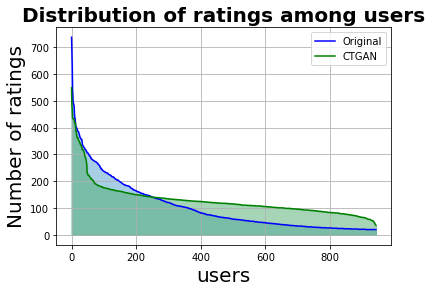

In [51]:
plot_distribution(df_users_orig, df_users_syn, 'users', user_plot_saving_filename)

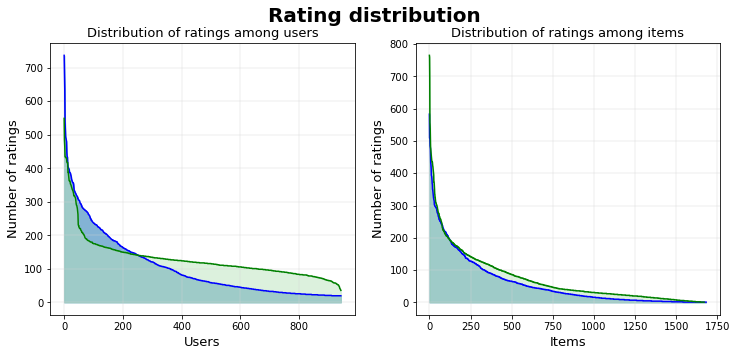

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

fig.savefig ("mainsreaminess_distribution_ratings_users_items.png")